# Purpose
1. Understand laplacian operator($\nabla$) on graph and draw analogies with it"s continous counterparts.
2. Applications of laplacian operators

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/Ankush-Chander/graph-notebooks/blob/main/notebooks/graph_laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/code/latebloomer/graph-laplacian-tutorial"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Library installation

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Breakdown

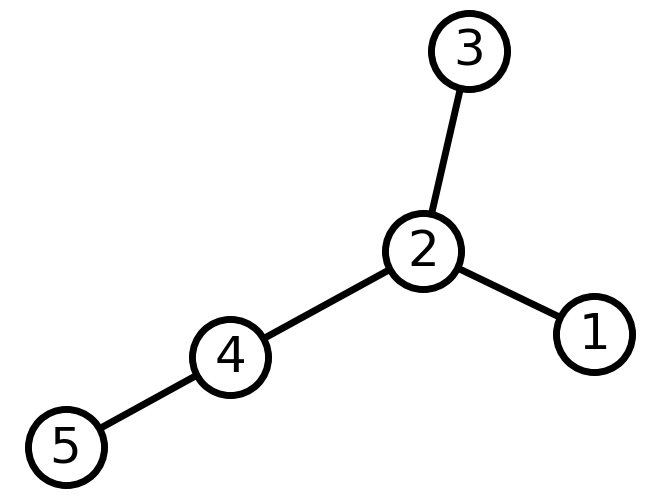

In [2]:
# create an example graph to be used for the remainder of definition
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

G1 = nx.Graph()
G1.add_edges_from(
    ((1, 2), (2, 3), (2, 4), (4, 5))
)
# label edges

# draw the graph
nx.draw(G1, with_labels=True, **options)



## Interesting matrices on a graph
**Degree matrix:** A degree matrix of a graph is a diagonal matrix with degrees of vertices on its main diagonal.

**Adjacency matrix:** An adjacency matrix of a graph is a square matrix used to represent a finite graph, with the (i,j)th entry indicating the number of edges from node i to node j.

**Incidence matrix:** The incidence matrix assigns each row to a node and each column to an edge. For a standard incidence matrix a 1 appears wherever a row’s node is incident on the column’s edge. For an oriented incidence matrix each edge is assigned an orientation (arbitrarily for undirected and aligning to direction for directed). A -1 appears for the source (tail) of an edge and 1 for the destination (head) of the edge. The elements are zero otherwise.

In [3]:
# matrix of interest

# degree matrix
degree_matrix = np.diag([d[1] for d in G1.degree()])
print(f"degree_matrix.shape: {degree_matrix.shape}")
print(f"degree_matrix (vertex X vertex)\n:{degree_matrix}")

# adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G1).todense()
print(f"adjacency_matrix.shape: {adjacency_matrix.shape}")
print(f"adjacency_matrix(vertex X vertex)\n:{adjacency_matrix}")

# incidence matrix
incidence_matrix = nx.incidence_matrix(G1, oriented=True).todense()
print(f"incidence_matrix.shape: {incidence_matrix.shape}")
print(f"incidence_matrix(edge X vertex):\n{incidence_matrix.shape}")

degree_matrix.shape: (5, 5)
degree_matrix (vertex X vertex)
:[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]
adjacency_matrix.shape: (5, 5)
adjacency_matrix(vertex X vertex)
:[[0 1 0 0 0]
 [1 0 1 1 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 0 0 1 0]]
incidence_matrix.shape: (5, 4)
incidence_matrix(edge X vertex):
(5, 4)


## Function on a graph
Let influence function, f be a mapping from node to degree of that node.
$$
f(node_i) = degree(node_i)
$$

In [4]:
f = np.diag(degree_matrix)
print(f"f:{f}")

f:[1 3 1 2 1]


## Gradient of graph function

In vector calculus, the [gradient](https://en.wikipedia.org/wiki/Gradient) of a scalar-valued differentiable function $f$ of several variables is the vector field (or vector-valued function) ∇
$ \nabla f$ whose value at a point $p$ gives the direction and the rate of fastest increase.
Gradient of a function gives us a vector(whose direction is the direction where maximum change is occuring, magnitude is the amount of change). So  gradient is an operator that takes as **input a scalar function** and **returns a vector field**.


The gradient of graph function to be an array of differences in the function value across each edge. That is, gradient of the function along the edge is given by $$ grad(f)|_e= f(u)− f(v)$$

Gradient of a function can be neatly calculated as $K^TF$ where K is incidence matrix(v,e) and F is function vector(v,1)

$$g = K^TF$$
Definitions:  
1. [Vector field](https://en.wikipedia.org/wiki/Vector_field) is an assignment of a vector to each point in a space, most commonly Euclidean space ${R}^n$ .A vector field on a plane can be visualized as a collection of arrows with given magnitudes and directions, each attached to a point on the plane. 

In [5]:
grad_f = incidence_matrix.T @ f
print(f"grad_f.shape: {grad_f.shape}")
print(f"grad_f:\n{grad_f}")


grad_f.shape: (4,)
grad_f:
[ 2. -2. -1. -1.]


## Divergence of gradient
In vector calculus, [divergence](https://en.wikipedia.org/wiki/Divergence) is a vector operator that operates on a vector field, producing a scalar field giving the quantity of the vector field's source at each point. More technically, the divergence represents the volume density of the outward flux of a vector field from an infinitesimal volume around a given point.

In the Euclidean space, divergence at a point gives the net outward flux of a vector field. For graphs, the vector field is just the gradient of a graph function! So, we define the divergence of a function g over the edges of a graph as a mapping from $g$ to $Kg$ where $K$ is the incidence matrix and g is the gradient of graph.

$$ div(gradient(f)) = Kg = KK^TF$$

In [6]:

# divergence of grad_f = incidence_matrix @ grad_f
dif_grad_f = incidence_matrix @ grad_f
print(f"dif_grad_f:\n{dif_grad_f}")



dif_grad_f:
[-2.  5. -2.  0. -1.]


# Definition

**via degree and adjacency matrix:**  
Laplacian matrix is a $v*v$ matrix which can be elementwise described as:

$$ L_{i,j} = 
    \begin{cases}
        degree(v\_i)       & \quad \text{if } \text{ i = j}\\
        -1        & \quad \text{if } \text{ i != j and }v_i \text{ is incident on } v_j\\
        0  & \quad  \text{otherwise}
    \end{cases}
$$
or equivalently by the matrix
$$ L=D-A $$
where $D$ is the degree matrix and $A$ is the adjacency matrix

**via incident matrix:** 

Laplacian matrix cab also be defined in terms of incident matrix $K$ as 
$$ L = K^TK$$

In [7]:
degree_minus_adjacency = degree_matrix - adjacency_matrix
print(f"degree_minus_adjacency:\n{degree_minus_adjacency}")

laplacian_matrix = incidence_matrix @ incidence_matrix.T
print(f"laplacian_matrix:\n{laplacian_matrix}")

degree_minus_adjacency:
[[ 1 -1  0  0  0]
 [-1  3 -1 -1  0]
 [ 0 -1  1  0  0]
 [ 0 -1  0  2 -1]
 [ 0  0  0 -1  1]]
laplacian_matrix:
[[ 1. -1.  0.  0.  0.]
 [-1.  3. -1. -1.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0. -1.  0.  2. -1.]
 [ 0.  0.  0. -1.  1.]]


# Intuition

"For continuous spaces, the Laplacian is the second derivative of the function right? So it kinda measures **how “smooth” the function is over its domain**. For graph functions, the Laplacian matrix basically tells you the exact same thing. That is, the Laplacian of a graph function determines how “smooth” the graph function is.  On graphs, a smooth function is a function that doesn’t change in value by much from one vertex to another connected vertex. **It is okay for a smooth function to ‘jump’ in value across vertices that are disconnected, but it can’t vary by much when the vertices are connected by an edge.**"[1] 


# Applications of Laplacian

## [Laplacian energy](https://math.wvu.edu/~cqzhang/Publication-files/my-paper/INS-2012-Laplacian-W.pdf)

Let $G = (V,E,W)$ be a weighted network on $n$ vertices, and $\lambda_1, \lambda_2, ..., \lambda_n$ be the eigenvalues of its Laplacian matrix.
The Laplacian energy of G is defined as the following invariant:
$$
E_L(G) =  \sum_{i=1}^{n} {\lambda_i}^2
$$

**Significance:**
| High Laplacian Energy | Low Laplacian Energy |
| --- | --- |
| Higher connectivity and complexity | Simpler or more sparse structure |
| More edges or connections | Fewer edges or connections |
| Higher symmetry or regularity | Less symmetry or regularity |
| Greater resilience to perturbations | More susceptible to perturbations |

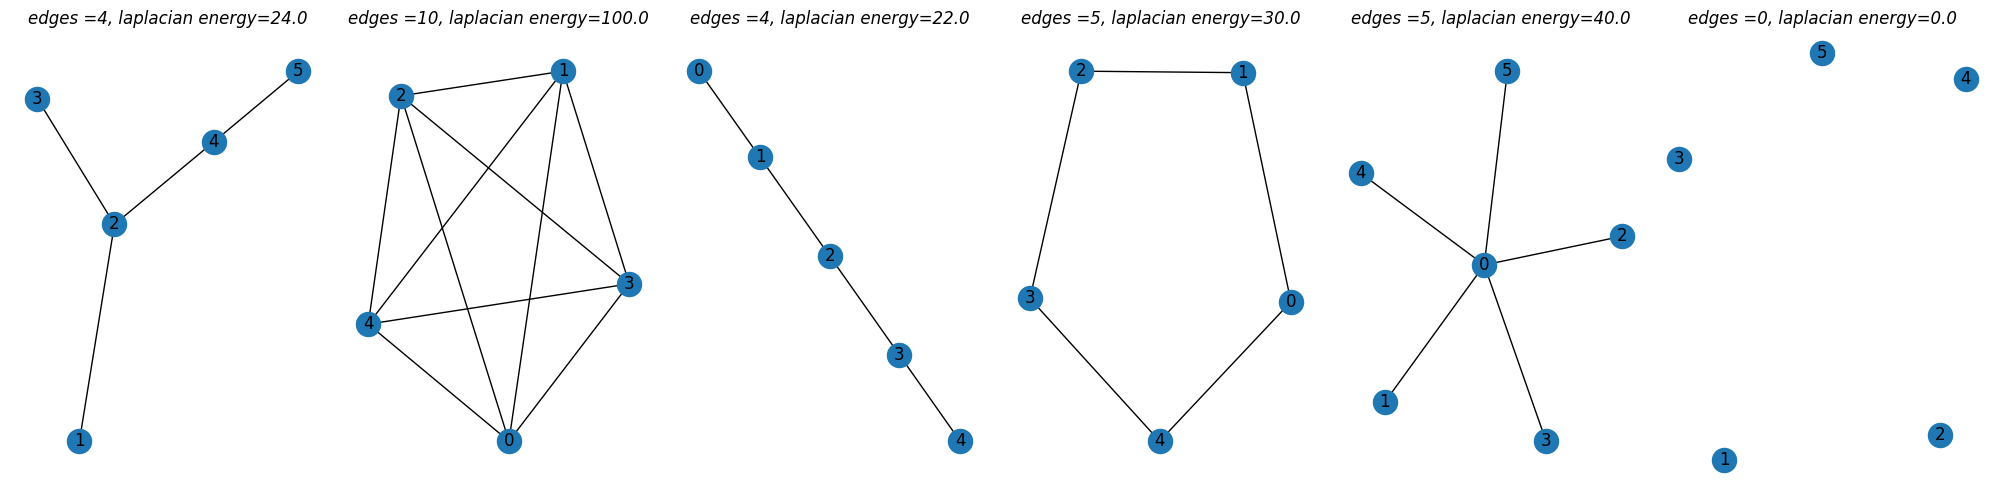

In [8]:
# define a complete graph of 5 vertices
G2 = nx.complete_graph(5)
# define a line graph of 5 vertices
G3 = nx.path_graph(5)

# define a cycle graph of 5 vertices
G4 = nx.cycle_graph(5)

# define a star graph of 5 vertices
G5 = nx.star_graph(5)

# define a graph of 5 vertices
G6 = nx.Graph()
G6.add_nodes_from([1, 2, 3, 4, 5])


def calculate_laplacian_energy(G):
    laplacian_matrix = nx.laplacian_matrix(G).todense()
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    return sum([eigenvalue ** 2 for eigenvalue in eigenvalues])


graphs = [G1, G2, G3, G4, G5, G6]
laplacian_energies = [calculate_laplacian_energy(G) for G in graphs]

# plot graphs
fig, ax = plt.subplots(1, len(graphs), figsize=(20, 5))

for i, a in enumerate(ax):
    a.set_title(f"edges ={len(graphs[i].edges)}, laplacian energy={round(laplacian_energies[i], 3)}",
                fontstyle='italic')
    nx.draw(graphs[i], with_labels=True, ax=ax[i])

plt.tight_layout()
plt.show()

## Laplacian centrality
The Laplacian Centrality of a node i is measured by the drop in the Laplacian Energy after deleting node i from the graph. The Laplacian Energy is the sum of the squared eigenvalues of a graph’s Laplacian matrix.
$$
CL(u_i, G) = \frac{E_L(G)- E_L(G_i)}{E_L(G)}
$$
where   
 $CL(u_i, G)$ is laplacian centrality of node $u_i$,  
 $E_L(G)$ is laplacian energy of a graph,  
 $E_L(G_i)$ is laplacian energy of a graph with node $u_i$ removed, 


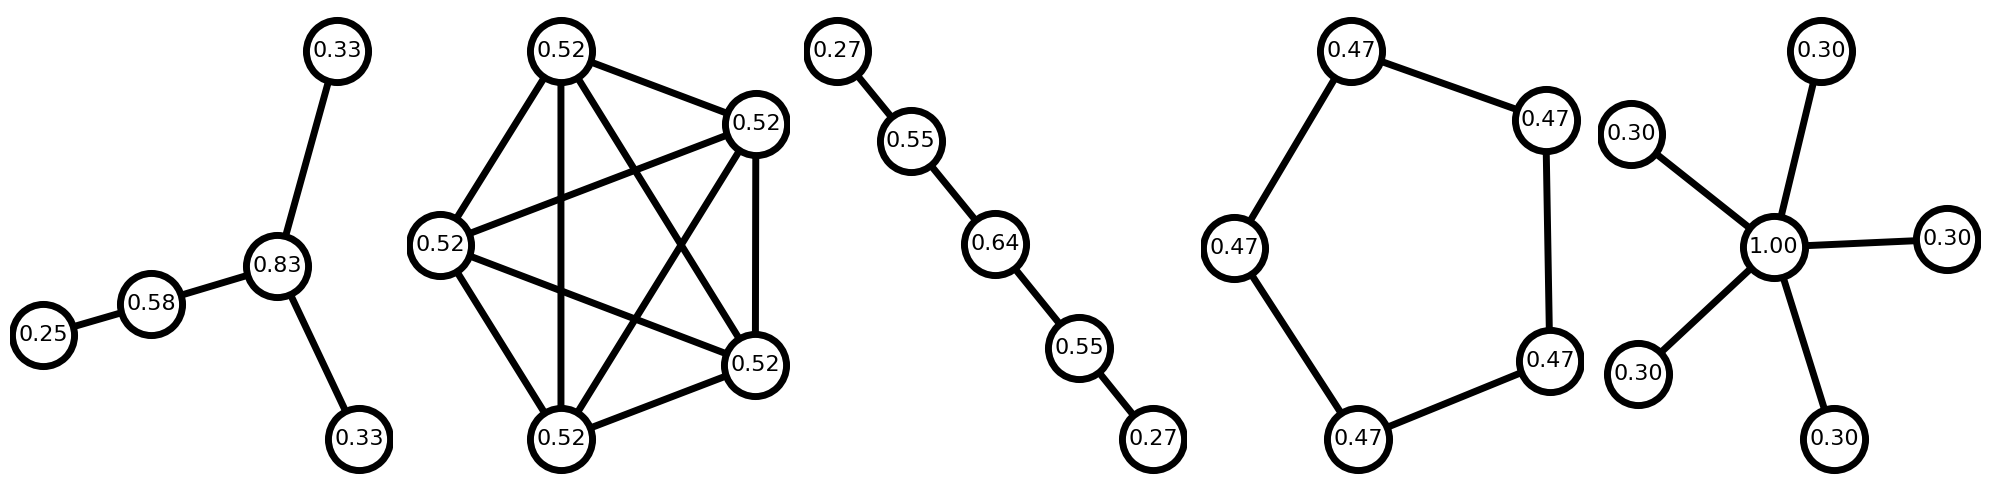

In [9]:
graphs = [G1, G2, G3, G4, G5]
nodewise_cenralities = [{v: f"{c:0.2f}" for v, c in nx.laplacian_centrality(G).items()} for G in graphs]

options = {
    "font_size": 16,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

# plot graphs
fig, ax = plt.subplots(1, len(graphs), figsize=(20, 5))
for i, a in enumerate(ax):
    nx.draw(graphs[i], labels=nodewise_cenralities[i], with_labels=True, ax=ax[i], **options)

plt.tight_layout()
plt.show()

# Lygometry
0. How does incidence matrix K neatly ends up as sole ingredient of laplacian operator in the form $KK^T$?
1. How does eigen values of laplacian matrix relate to  energy of the graph or connectedness of the graph?

# References
0. [MathOverflow answer by Mirco A. Mannucci| What does Graph laplacian represent?](https://mathoverflow.net/questions/368963/intuitively-what-does-a-graph-laplacian-represent/368970#368970?newreg=cd18705fd77d42f9b9efc7eeba5ac84c)
1. [Quora answer by Muni Sreenivas| What's the intuition behind a Laplacian matrix?](https://www.quora.com/Whats-the-intuition-behind-a-Laplacian-matrix-Im-not-so-much-interested-in-mathematical-details-or-technical-applications-Im-trying-to-grasp-what-a-laplacian-matrix-actually-represents-and-what-aspects-of-a-graph-it-makes-accessible/answer/Muni-Sreenivas-Pydi)
2. [Blog by Matthew N. Bernstein| Laplacian matrix](https://mbernste.github.io/posts/laplacian_matrix/)
3. [Wiki | Gradient](https://en.wikipedia.org/wiki/Gradient)
4. [Wiki| Divergence](https://en.wikipedia.org/wiki/Divergence)
5. [Wiki| Laplacian matrix](https://en.wikipedia.org/wiki/Laplacian_matrix)
6. [Paper| Laplacian centrality by Xingqin Q et al.](https://math.wvu.edu/~cqzhang/Publication-files/my-paper/INS-2012-Laplacian-W.pdf)